<b><h1>Part 1 ‑ Exploratory data analysis</h1>
    
<h4>The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.</h4></b>

In [1]:
import pandas as pd

In [41]:
login = pd.read_json('logins.json', orient='records')

In [162]:
from pandas_profiling import ProfileReport
#profiling = ProfileReport(login)

In [163]:
login.describe()

,login_time,time,time_floor,login_time_floor,time_group
count,93142,93142,93142,93142,93142
unique,92265,52960,9381,9381,96
top,1970-02-12 11:16:53,01:43:52,1970-03-01 04:30:00,1970-03-01 04:30:00,22:30:00
freq,3,9,73,73,1684
first,1970-01-01 20:12:16,NaN,1970-01-01 20:00:00,1970-01-01 20:00:00,NaN
last,1970-04-13 18:57:38,NaN,1970-04-13 18:45:00,1970-04-13 18:45:00,NaN


In [164]:
login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 5 columns):
login_time          93142 non-null datetime64[ns]
time                93142 non-null object
time_floor          93142 non-null datetime64[ns]
login_time_floor    93142 non-null datetime64[ns]
time_group          93142 non-null object
dtypes: datetime64[ns](3), object(2)
memory usage: 3.6+ MB


In [165]:
login.head()

,login_time,time,time_floor,login_time_floor,time_group
0,1970-01-01 20:13:18,20:13:18,1970-01-01 20:00:00,1970-01-01 20:00:00,20:00:00
1,1970-01-01 20:16:10,20:16:10,1970-01-01 20:15:00,1970-01-01 20:15:00,20:15:00
2,1970-01-01 20:16:37,20:16:37,1970-01-01 20:15:00,1970-01-01 20:15:00,20:15:00
3,1970-01-01 20:16:36,20:16:36,1970-01-01 20:15:00,1970-01-01 20:15:00,20:15:00
4,1970-01-01 20:26:21,20:26:21,1970-01-01 20:15:00,1970-01-01 20:15:00,20:15:00


In [52]:
import datetime
login['time'] = login['login_time'].apply(lambda x: x.time())

In [110]:
login['login_time_floor'] = login['login_time'].apply(lambda x: x.floor("15min"))

In [111]:
login['time_group'] = login['login_time_floor'].apply(lambda x: x.time())

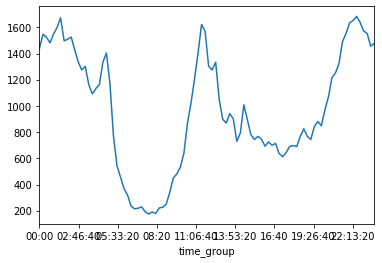

In [117]:
import matplotlib.pyplot as plt
login.groupby('time_group').count()['login_time_floor'].plot()


In [79]:
# date_rng = pd.date_range(start='00:00', end='23:59', freq='15min')
# time_rng = pd.DataFrame(date_rng)
# time_rng['time']=pd.to_datetime(time_rng[0])
# time_rng['time'] = time_rng['time'].apply(lambda x: x.time())
# time_rng
# new= pd.merge(left=login, right=time_rng, how='left', on='time')

In [99]:
# data = pd.read_json('ultimate_data_challenge.json', orient='')

<b><h1>Part 1 Conclusion</h1>
    
<h4>There are three peaks in the daily cycle: Noon, 10pm and 2am. Some hypothesis behind the pattern would be running errands during lunch breaks (noon), heading home after dinner with friends and family (10pm), and heading home after bars are closed (2am). The two troughs formed are right before the daily rush hours: 8:15am for the morning rush hours and 4:45pm for the afternoon one.</h4></b>

<b><h1>Part 2 ‑ Experiment and metrics design</h1>



<h4>The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.</h4>
    
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success.</b>

    Please provide details on:
        a. how you will implement the experiment
        b. what statistical test(s) you will conduct to verify the significance of the
        observation
        c. how you would interpret the results and provide recommendations to the city
        operations team along with any caveats.

<b>1. if the driver is picking up more trips between two cities instead of just focusing on local rides, the average distance travelled per driver per day or per month should increase. Hence it is a very intuitive KPI for measuring the success of the new policy: reimbursing all toll costs to boost inter-city rides.</b>

<b>2. The practical experiment here is a A/B test to compare two sample means. The two samples can be formed by random sampling from the driver pool, as there is no obvious network effects or novelty effects. The null hypothesis is that the control and the test have the same metric: average distance travelled per driver per day. The alternative one is that the test group has a higher metric (average distance travelled per driver per day) than the one of the control. Hence a one-side t-test will be employed to verify the significance of the observation. The sample size depends on statistical significance (5%), power of test (80%), standard deviation, and the minimum change effect. The duration of the test depends on how long it takes to reach the desirable sample size. If the duration is less than two weeks, we will keep running the test for at least two weeks to capture the weekly effect.</b>

<b>Interpretation of the result should pay equal emphasis on statistical significance as well as practical significance. For example, say the policy drives up the inter-city trips sinficantly but the reimbursement is causing operating loss at the company. If this is the case, it should not be implemented for the long run, although short term promotion might still be warranted.</b>

<b><h1>Part 3 ‑ Predictive modeling</h1></b>


<h4>Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.</h4>

    1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
    data for this analysis (a few sentences/plots describing your approach will suffice). What
    fraction of the observed users were retained?
    2. Build a predictive model to help Ultimate determine whether or not a user will be active
    in their 6th month on the system. Discuss why you chose your approach, what
    alternatives you considered, and any concerns you have. How valid is your model?
    Include any key indicators of model performance.
    3. Briefly discuss how Ultimate might leverage the insights gained from the model to
    improve its long­term rider retention (again, a few sentences will suffice).

In [159]:
import json
with open('ultimate_data_challenge.json') as datafile:
    data = json.load(datafile)
rides = pd.DataFrame(data)

In [160]:
profiling = ProfileReport(rides)

/opt/anaconda3/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [161]:
profiling

Number of variables,12
Number of observations,50000
Total Missing (%),1.5%
Total size in memory,4.2 MiB
Average record size in memory,89.0 B
Numeric,7
Categorical,4
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [123]:
rides.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [124]:
rides.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [125]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [127]:
rides.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [128]:
rides.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [129]:
rides.signup_date = pd.to_datetime(rides.signup_date)

In [130]:
rides.last_trip_date = pd.to_datetime(rides.last_trip_date)

In [131]:
mapping ={'Winterfell':1,'Astapor':2, "King's Landing":3, 'iPhone':0, 'Android':1}

In [133]:
rides = rides.replace(mapping)

In [134]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null int64
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null datetime64[ns]
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null float64
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(7), int64(2)
memory usage: 4.2 MB


In [135]:
rides.describe()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000.000000,41878.000000,50000.000000,49604.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,1.735880,2.278200,4.601559,1.074764,0.302838,8.849536,60.926084,5.796827,4.778158
std,0.774321,3.792684,0.617338,0.222336,0.459491,19.958811,37.081503,5.707357,0.446652
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,4.300000,1.000000,0.000000,0.000000,33.300000,2.420000,4.700000
50%,2.000000,1.000000,4.900000,1.000000,0.000000,0.000000,66.700000,3.880000,5.000000
75%,2.000000,3.000000,5.000000,1.050000,1.000000,8.600000,100.000000,6.940000,5.000000
max,3.000000,125.000000,5.000000,8.000000,1.000000,100.000000,100.000000,160.960000,5.000000


In [136]:
rides.dropna(inplace=True)

In [137]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
city                      41445 non-null int64
trips_in_first_30_days    41445 non-null int64
signup_date               41445 non-null datetime64[ns]
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
last_trip_date            41445 non-null datetime64[ns]
phone                     41445 non-null float64
surge_pct                 41445 non-null float64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(7), int64(2)
memory usage: 3.8 MB


In [138]:
rides['active_6th'] = rides['last_trip_date'].apply(lambda x: 1 if x.month==6 else 0)

In [139]:
rides.describe()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active_6th
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,1.749403,2.609675,4.601720,1.073822,0.291784,8.898709,61.254897,5.460046,4.776446,0.398263
std,0.781835,4.059336,0.616104,0.198747,0.454589,18.322061,34.813848,5.145174,0.404606,0.489546
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,4.300000,1.000000,0.000000,0.000000,37.500000,2.420000,4.700000,0.000000
50%,2.000000,1.000000,4.900000,1.000000,0.000000,0.000000,66.700000,3.780000,5.000000,0.000000
75%,2.000000,3.000000,5.000000,1.070000,1.000000,11.100000,100.000000,6.490000,5.000000,1.000000
max,3.000000,125.000000,5.000000,8.000000,1.000000,100.000000,100.000000,79.690000,5.000000,1.000000


<b>1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?</b>

Pandas profiling to examine the data in terms of high cardinality, missing values and zeros. The graphs for each variable also shed light on distribution and outliers. The retention rate for driver on the 6th month is around 40%.

In [145]:
X=rides.drop(['active_6th','signup_date','last_trip_date'], axis=1)
y=rides['active_6th']

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [147]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)


predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)

0.6724570546226597


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [148]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[5129 1069]
 [2325 1839]]


In [150]:
## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 
## This line instantiates the model. 
rf = RandomForestClassifier() 
## Fit the model on your training data.
rf.fit(X_train, y_train) 
## And score it on your testing data.
rf.score(X_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7254391044199962

In [152]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',  ascending=False)

In [153]:
feature_importances

,importance
avg_dist,0.276156
avg_rating_by_driver,0.145388
weekday_pct,0.135068
trips_in_first_30_days,0.085234
avg_rating_of_driver,0.078964
city,0.078232
surge_pct,0.075508
avg_surge,0.061926
phone,0.033560
ultimate_black_user,0.029964


In [154]:
import xgboost as xgb
classifier = xgb.sklearn.XGBClassifier(nthread=-1, seed=42)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print("Model Accuray: {:.2f}%".format(100*classifier.score(X_test, y_test)))

Model Accuray: 76.83%


In [155]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[5148 1050]
 [1351 2813]]


In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
param_grid = {'max_depth':np.arange(1,5),'n_estimators':np.arange(100,200,50),'max_features':('auto', 'sqrt', 'log2')}
clf = RandomForestClassifier()
clf_cv= GridSearchCV(clf,param_grid,cv=5)
clf_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [157]:
print("Best Score:" + str(clf_cv.best_score_))
print("Best Parameters: " + str(clf_cv.best_params_))

Best Score:0.749445034263102
Best Parameters: {'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100}


<b>2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.</b>
    




The problem here is a typical classification question: whether or not the driver will be active in 6 months. I start with the simplest model to tackle classification: Logistic Regression. Later, I employ Random Forest, Random Forest with XGboost, then hyperparameter tuning. The model performance is measured by accuracy score. According to the accuracy score, Random Forest with XGboost is able to correctly classify 80% of the sample. The sample set is not imbalanced but F1 Score could be a better indicator to measure model performance. 

<b>3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).</b>

According to the feature importance, avg_dist, avg_rating_by_driver, and weekday_pct are the top three variables when it comes to predict the likelihood of a driver to be active in month 6. Therefore, any promotions that encourage the driver to take longer trips and drive during weekdays will likely to increase the retention rate. 